Basic Machine Learning Project

Authors: Oscar Gamarra; Manuel Ayllon

In [23]:
# Write down importations and functions you need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Load the data:
df_train = pd.read_csv('train_2024.csv')
df_test = pd.read_csv('test_2024.csv') # to be used at the very end

# Have a taste of each dataset:
print(df_train.describe())
df_train.head()
# One can see already that the data is imbalanced (look at Gene 1 and compare it with Gene 4 or 1994)

,Gene 1,Gene 2,Gene 3,Gene 4,Gene 5,Gene 6,Gene 7,Gene 8,Gene 9,Gene 10,...,Gene 1993,Gene 1994,Gene 1995,Gene 1996,Gene 1997,Gene 1998,Gene 1999,Gene 2000,Outcome,Id
0,4.0,107.0,135.0,15752.0,459.0,189.0,222.0,2258.0,2992.0,77.0,...,156.0,18368.0,318.0,89.0,307.0,82.0,227.0,302.0,3,3328
1,4.0,96.0,130.0,13704.0,486.0,244.0,298.0,NaN,1874.0,50.0,...,82.0,21033.0,375.0,NaN,426.0,91.0,232.0,116.0,1,2085
2,5.0,139.0,71.0,13866.0,326.0,418.0,402.0,2833.0,1821.0,64.0,...,122.0,13853.0,244.0,114.0,273.0,87.0,219.0,NaN,3,2455
3,3.0,135.0,47.0,14945.0,432.0,239.0,224.0,3020.0,2958.0,69.0,...,50.0,16328.0,289.0,NaN,NaN,98.0,244.0,312.0,3,2457
4,2.0,69.0,48.0,8758.0,337.0,214.0,358.0,NaN,3388.0,80.0,...,119.0,10714.0,557.0,99.0,206.0,107.0,136.0,364.0,1,3641


**EXERCISE 1**

Do some exploratory data analysis. Don’t just look globally, also look at (some of) these metrics by class. There might be differences, after all:  
- How many missing data are there?  
- Are there other strange values in the data?  
- What is the proportion of classes in your data?  
- How many genes (features) have entirely equal measured expression values as other genes (i.e. are there duplicate columns in the data)?  
- What is the maximum value in the data, and the minimum?  
- Which feature has the highest variance?  
- Finally, make a boxplot of the expression values of the 30 features with the highest variance in the dataset, ordered by this variance.

Missing data check:
Gene 1       250
Gene 2       237
Gene 3       266
Gene 4       255
Gene 5       249
            ... 
Gene 1998    259
Gene 1999    252
Gene 2000    236
Outcome        0
Id             0
Length: 2002, dtype: int64

Data Types check:
Gene 1       float64
Gene 2       float64
Gene 3       float64
Gene 4       float64
Gene 5       float64
              ...   
Gene 1998    float64
Gene 1999    float64
Gene 2000    float64
Outcome        int64
Id             int64
Length: 2002, dtype: object
Class Proportions:
Outcome
3    0.363636
2    0.250284
1    0.207386
0    0.178693
Name: count, dtype: float64
Number of Duplicate Gene Expression: 0
Maximum Value: 51663.0   |   Minimum Value: 0.0
Gene with the Highest Variance: Gene 1127
Displaying Boxplot of the Top 30 Genes with highest variance


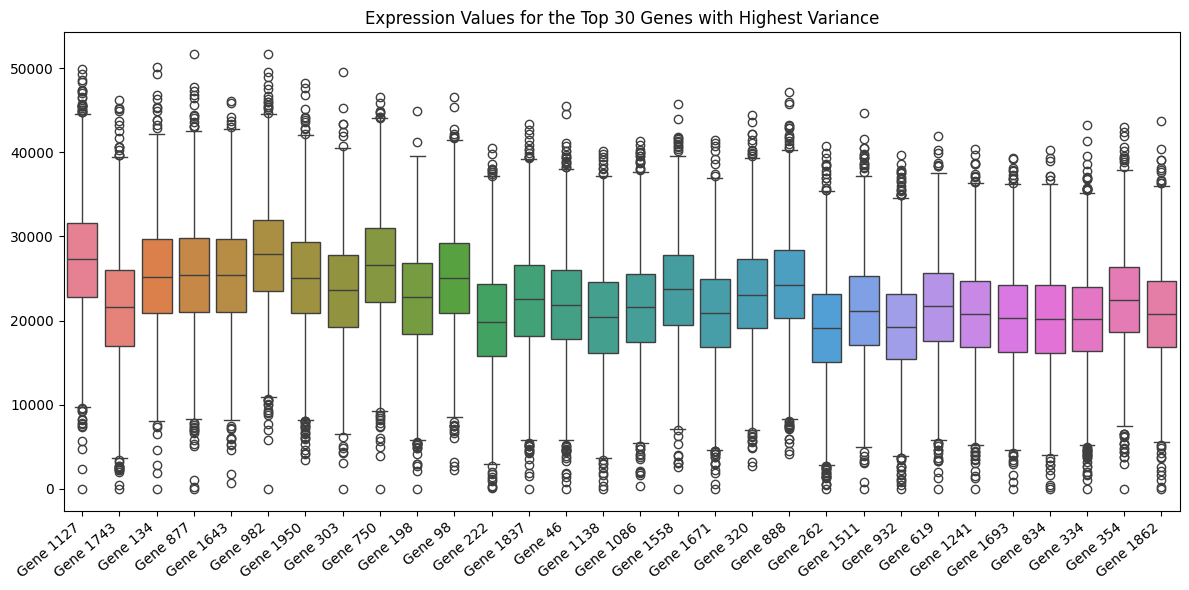

In [33]:
# -------------------------------------------------------------------------------------
print("Missing data check:")
print(df_train.isnull().sum())
# -------------------------------------------------------------------------------------
print("\nData Types check:")
print(df_train.dtypes)
# -------------------------------------------------------------------------------------
class_counts = df_train['Outcome'].value_counts()
# Calculate the proportion of each class
class_proportions = class_counts / len(df_train)
print("Class Proportions:")
print(class_proportions)
# -------------------------------------------------------------------------------------
num_duplicate_columns = df_train.columns.duplicated().sum()
print("Number of Duplicate Gene Expression:", num_duplicate_columns)
# -------------------------------------------------------------------------------------
max_value = df_train.max().max()
min_value = df_train.min().min()
print("Maximum Value:", max_value, '  |  ' ,'Minimum Value:', min_value )
# -------------------------------------------------------------------------------------
variances = df_train.var()
gene_with_highest_variance = variances.idxmax()
print("Gene with the Highest Variance:", gene_with_highest_variance)
# -------------------------------------------------------------------------------------
print('Displaying Boxplot of the Top 30 Genes with highest variance')
# Calculate variance for each Gene (Feature), and sort them from higher to lower
variances = df_train.var()
variances_sorted = variances.sort_values(ascending=False)
# Select the top 30 features and create a dataframe with them
top30 = variances_sorted[:30].index.tolist()
top30_df = df_train[top30]
# Making the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=top30_df)
ax.set_xticks(range(len(top30)))
ax.set_xticklabels(top30, rotation=40, ha="right")
ax.set_title('Expression Values for the Top 30 Genes with Highest Variance')
plt.tight_layout()
plt.show()
# -------------------------------------------------------------------------------------